In [45]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [18]:
# load SNN the noise dataset
snn_res = np.load("results/noise_exp_06_36_08.npz")
rc_res = snn_res["rc_res"]
svm_res = snn_res["svm_res"]

In [20]:
rc_res

array({'acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.25, 0.25, 0.75, 0.75, 0.75, 1.0, 0.75, 0.5, 0.75, 0.75, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.5, 0.75, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 0.75, 0.75, 0.5, 1.0, 0.75, 1.0, 0.5, 0.75, 0.5, 0.75, 0.25, 0.5, 0.25, 0.25, 0.5, 0.25, 0.5, 0.75, 0.75, 0.75, 0.75, 1.0, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'diff': [array([ 127.77160605,   14.03658234,   85.92178208,  236.4864973 ]), array([ 201.94621897,   53.8284117 ,   98.40141895,   87.78646694]), array([ 172.83830756,   53.47078372,  108.07976819,  121.37141779]), array([ 216.56931161,   91.47278529,  138.85488384,   96.28206315]), array([ 161.31408897,  153.92698265,  118.61366946,  138.0111694 ]), array([ 160.11295295,   23.85649658,   78.88763332,  179.20123525]), array([ 177.65163655,   11.97354339,   87.66141238,  153.48495236]), 

In [5]:
# make a plot for each dataset, then one for all of them averaged together
# make that lmplot

In [111]:
# load the ANN dataset
ann_res = np.load("results/ann_noise_exp_06_17_52.npz")
ann_acc = ann_res['ann_res'].item()['acc']
print(ann_acc)

[0.75, 1.0, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 0.75, 0.5, 0.75, 0.75, 0.5, 0.5, 0.5, 0.75, 0.5, 0.75, 0.75, 0.75, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 1.0, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.5, 0.5, 0.5, 0.75, 0.5, 0.75, 0.5, 0.5, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [23]:
# make the same plots

In [24]:
# try to put them side-by-side?

In [69]:
# get class-test results for LIF at the iteration 10 and 20
lif_res = np.load("results/class_exp_03_08_12.npz")
print(lif_res.keys())
sig_list = ["WhiteSignal Continuous", "Orthogonal Interpolation", "WhiteNoise Discrete"]
print(lif_res["class_nums"])
print(lif_res['exp_iter'])

['svm_res', 'class_nums', 'rc_res', 'exp_iter']
[ 3  5 10 20 40]
10


In [98]:
rc_acc = np.array(lif_res['rc_res'].item()['acc'])
# shape = sig_type, class_num, exp_iter 
rc_acc = rc_acc.reshape((-1, len(lif_res["class_nums"]), lif_res['exp_iter']))
n_list = lif_res["class_nums"]
print(rc_acc.shape)
new_rc = []
for sig in range(rc_acc.shape[0]):
    for n_cls in range(rc_acc.shape[1]):
        for run in range(rc_acc.shape[2]):
            # data, label, label
            new_rc.append((rc_acc[sig, n_cls, run], sig_list[sig], n_list[n_cls], "LIF"))
            
df = pd.DataFrame(new_rc, columns=["Accuracy", "Signal Type", "Number of Classes", "Neuron Type"])

(3, 5, 10)


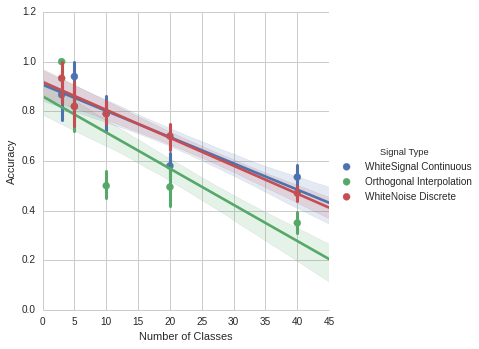

In [81]:
sns.lmplot("Number of Classes", "Accuracy", hue="Signal Type", data=df, x_estimator=np.mean)

In [99]:
# get class-test results for ALIF
a_res = np.load("results/alif_exp_04_39_20.npz")
a_acc = np.array(a_res['rc_res'].item()['acc'])
a_acc = a_acc.reshape((-1, len(a_res["class_nums"]), a_res['exp_iter']))
print(a_acc.shape)
n_list = a_res["class_nums"]

for sig in range(a_acc.shape[0]):
    for n_cls in range(a_acc.shape[1]):
        for run in range(a_acc.shape[2]):
            # data, label, label
            #print("%s, %s, %s" %(sig, n_cls, run))
            new_rc.append((a_acc[sig, n_cls, run], sig_list[sig], n_list[n_cls], "Adaptive LIF"))
            
neuron_frame = pd.DataFrame(new_rc, columns=["Accuracy", "Signal Type", "Number of Classes", "Neuron Type"])

(3, 3, 10)


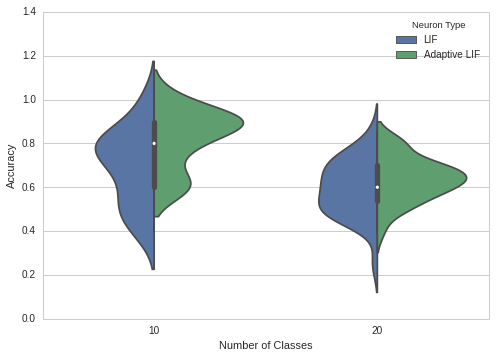

In [107]:
# plot them side-by-side somehow
vio_frame = neuron_frame[(neuron_frame["Number of Classes"] == 10) | (neuron_frame["Number of Classes"] == 20)]
sns.violinplot('Number of Classes', 'Accuracy', hue='Neuron Type', data=vio_frame, split=True, inner='box')